In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:

# Order by n in site
sites = ['SZ3',
        'SZ6',
        'Svip2',
        'ADHD6',
        'HSJ',
        'UCLA_CB',
        'Svip1',
        'UKBB11026',
        'UKBB11027',
        'UKBB11025',
        'ADHD1',
        'ADHD3',
        'ADHD5',
        'UCLA_DS1']

site_labels = [
'SZ3                 n=31',
'SZ6                 n=35',
'SVIP2             n=36',
'ADHD6           n=39',
'HSJ                 n=39',
'UCLA_CB       n=43',
'SVIP1             n=48',
'UKBB11026    n=50',
'UKBB11027    n=50',
'UKBB11025    n=50',
'ADHD1           n=54',
'ADHD3           n=56',
'ADHD5           n=77',
'UCLA_DS1     n=94']

p_sex = '../../results_reviews/sex/'

# Load Data

In [10]:
# Single Task

st_data = []
for site in sites:
    folds = []
    for fold in range(5):
        p_parent = os.path.join(p_sex, f"{site}/fold_{fold}")
        file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
        df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])[site]
        folds.append(df['Accuracy/test'].iloc[-1])
    st_data.append(folds)

st_data = dict(zip(sites,st_data))

In [11]:
df_st = pd.DataFrame(st_data)
df_st['type'] = 'baseline'
df_st

,SZ3,SZ6,Svip2,ADHD6,HSJ,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,ADHD5,UCLA_DS1,type
0,42.857143,57.142857,62.500000,62.500000,50.000000,33.333333,60.000000,70.0,70.0,50.0,72.727273,41.666667,68.750000,63.157895,baseline
1,33.333333,85.714286,71.428571,50.000000,37.500000,66.666667,60.000000,90.0,70.0,50.0,63.636364,45.454545,56.250000,78.947368,baseline
2,100.000000,42.857143,57.142857,25.000000,37.500000,77.777778,60.000000,80.0,90.0,70.0,45.454545,27.272727,60.000000,73.684211,baseline
3,66.666667,57.142857,57.142857,50.000000,25.000000,50.000000,44.444444,80.0,80.0,70.0,63.636364,63.636364,33.333333,84.210526,baseline
4,66.666667,71.428571,57.142857,57.142857,57.142857,25.000000,55.555556,80.0,60.0,70.0,70.000000,45.454545,66.666667,77.777778,baseline


In [12]:
# Multi-task

mtl_data = []
for fold in range(5):
    p_parent = os.path.join(p_sex, f"all/fold_{fold}")
    file = [f for f in os.listdir(p_parent) if f[-4:]=='.csv'][0]
    df = pd.read_csv(os.path.join(p_parent,file),index_col=0,header=[0,1])
    acc = []
    for site in sites:
        acc.append(df[site]['Accuracy/test'].iloc[-1])
    mtl_data.append(acc)



In [13]:
df_mtl = pd.DataFrame(mtl_data,index=range(5),columns=sites)
df_mtl['type'] = 'mtl'
df_mtl

,SZ3,SZ6,Svip2,ADHD6,HSJ,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,ADHD5,UCLA_DS1,type
0,42.857143,57.142857,50.000000,62.500000,50.000000,44.444444,70.000000,70.0,60.0,70.0,90.909091,41.666667,68.750000,63.157895,mtl
1,50.000000,85.714286,71.428571,50.000000,62.500000,66.666667,60.000000,100.0,80.0,50.0,63.636364,45.454545,62.500000,68.421053,mtl
2,83.333333,71.428571,71.428571,50.000000,37.500000,33.333333,60.000000,90.0,80.0,90.0,54.545455,36.363636,53.333333,73.684211,mtl
3,83.333333,57.142857,28.571429,37.500000,50.000000,62.500000,33.333333,60.0,80.0,40.0,63.636364,54.545455,46.666667,78.947368,mtl
4,83.333333,85.714286,28.571429,57.142857,42.857143,62.500000,77.777778,80.0,80.0,60.0,90.000000,54.545455,66.666667,77.777778,mtl


In [14]:
df_master = pd.concat([df_mtl,df_st])
df_master

,SZ3,SZ6,Svip2,ADHD6,HSJ,UCLA_CB,Svip1,UKBB11026,UKBB11027,UKBB11025,ADHD1,ADHD3,ADHD5,UCLA_DS1,type
0,42.857143,57.142857,50.000000,62.500000,50.000000,44.444444,70.000000,70.0,60.0,70.0,90.909091,41.666667,68.750000,63.157895,mtl
1,50.000000,85.714286,71.428571,50.000000,62.500000,66.666667,60.000000,100.0,80.0,50.0,63.636364,45.454545,62.500000,68.421053,mtl
2,83.333333,71.428571,71.428571,50.000000,37.500000,33.333333,60.000000,90.0,80.0,90.0,54.545455,36.363636,53.333333,73.684211,mtl
3,83.333333,57.142857,28.571429,37.500000,50.000000,62.500000,33.333333,60.0,80.0,40.0,63.636364,54.545455,46.666667,78.947368,mtl
4,83.333333,85.714286,28.571429,57.142857,42.857143,62.500000,77.777778,80.0,80.0,60.0,90.000000,54.545455,66.666667,77.777778,mtl
0,42.857143,57.142857,62.500000,62.500000,50.000000,33.333333,60.000000,70.0,70.0,50.0,72.727273,41.666667,68.750000,63.157895,baseline
1,33.333333,85.714286,71.428571,50.000000,37.500000,66.666667,60.000000,90.0,70.0,50.0,63.636364,45.454545,56.250000,78.947368,baseline
2,100.000000,42.857143,57.142857,25.000000,37.500000,77.777778,60.000000,80.0,90.0,70.0,45.454545,27.272727,60.000000,73.684211,baseline
3,66.666667,57.142857,57.142857,50.000000,25.000000,50.000000,44.444444,80.0,80.0,70.0,63.636364,63.636364,33.333333,84.210526,baseline
4,66.666667,71.428571,57.142857,57.142857,57.142857,25.000000,55.555556,80.0,60.0,70.0,70.000000,45.454545,66.666667,77.777778,baseline


# Plots

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37517/3441240720.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37517/3441240720.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37517/3441240720.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37517/3441240720.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_37517/3441240720.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels([None,None])
/var/folders/5x/9dwn0lbx6

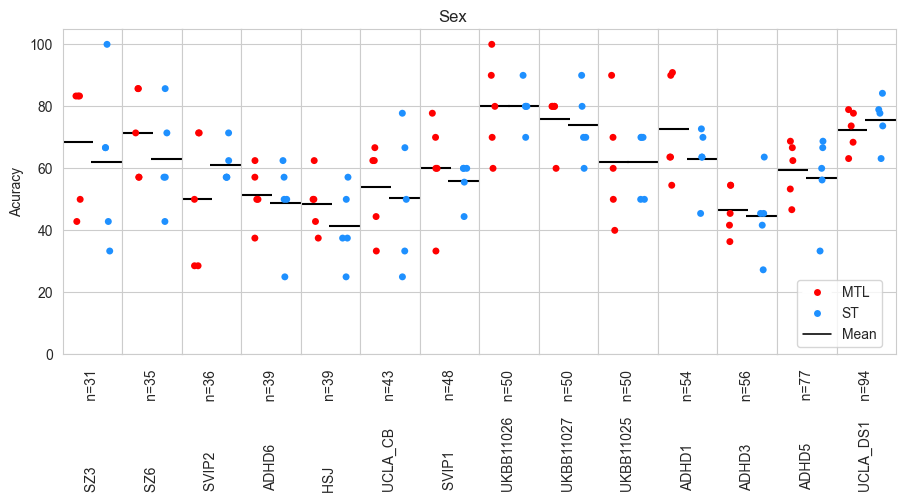

In [21]:
colors = ['black','darkorchid','red','orange','dodgerblue','forestgreen']
colors = ['red','dodgerblue']
sns.set_style('whitegrid')

fig,ax = plt.subplots(1,14,figsize=(9,5),sharey=True)
for i, site in enumerate(sites):
    sns.stripplot(data=df_master, x='type',y=site,hue='type',ax=ax[i],legend=False,palette=colors)
    ax[i].scatter('mtl',df_master[df_master['type']=='mtl'][site].mean(),color='black',marker='_',sizes=[500])
    ax[i].scatter('baseline',df_master[df_master['type']=='baseline'][site].mean(),color='black',marker='_',sizes=[500])
    ax[i].set_xticklabels([None,None])
    ax[i].set_xlabel(site_labels[i],rotation=90)
    
    ax[i].set_xlim(-0.5,1.5)
ax[0].set_ylabel('Acuracy')

from matplotlib.lines import Line2D
handles = [Line2D([0], [0], marker='o',color='w', label='MTL',
                          markerfacecolor=colors[0]),
        Line2D([0], [0], marker='o', color='w', label='ST',
                          markerfacecolor=colors[1]),
        Line2D([0], [0], color='black', label='Mean',
                           linewidth=1.15,ls='-')
                          ]
labels = ['MTL','ST','Mean']
fig.legend(handles, labels, loc=(0.88,0.31))

plt.suptitle ('Sex')
plt.ylim(0,105)
plt.tight_layout(pad=0.5)
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join('./figures/sex_acc_distribution.png'),dpi=300)